---
layout: default
categories: linearRegression
title: "Linear Regression - Cost Function"
permalink: /ML3/
order: 3
comments: true
---

In [15]:
%pylab --no-import-all inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Cost Function
We can measure the accuracy of our hypothesis function by using a cost function. The cost function calculates the **distance** of predicted data from observed data, obviously we want our predicted data to be as close as possible to truth values, in other words we want to **minimize** the distance from truth values.

This version of cost function takes an average difference (actually a fancier version of an average) of all the results of the hypothesis with inputs from $x$ and the actual output $y$.

$$\begin{align}
J(\theta_0,\theta_1) & = \frac{1}{2m}\sum^m_{i=1}\left(\hat{y}_i-y_i\right)^2 \\
& = \frac{1}{2m}\sum^m_{i=1}\left(h_{\theta}(x_i) - y_i \right)^2 \\
& = \frac{1}{2m}\sum^m_{i=1}\left(\left(\theta_0 + \theta_{1}x^{(i)}\right) - y_i \right)^2 
\end{align}$$

To break it apart, it is $\frac{1}{2} \bar{x}$ where $\bar{x}$ is the mean of the squares of $h_\theta (x_{i}) - y_{i}$ or the difference (**distance**) between the predicted value and the actual value.

This function is otherwise called the "Squared error function", or "Mean squared error". The mean is halved $\left(\frac{1}{2}\right)$ as a convenience for the computation of the gradient descent, as the derivative term of the square function will cancel out the $\frac{1}{2}$ term.

In [16]:
J = lambda p, y : np.average(np.square((p - y)), axis=0) / 2

---
The idea is to chose $\theta_0, \theta_1$ to so that $h_\theta(x)$ is close to $y$ for each training example $(x,y)$. In other words we want to chose $\theta_0, \theta_1$ to minimize the cost function $J\left(\theta_0, \theta_1 \right)$

---
If we try to think of it in visual terms, our training data set is scattered on the $x,y$ plane. We are trying to make a straight line (defined by $h_\theta(x)$) which passes through these scattered data points. 

Our objective is to get the best possible line. The best possible line will that line for which the average squared vertical distance of the scattered points from the line will be the least. Ideally, the line should pass through all the points of our training data set. In such a case, the value of $J(\theta_0, \theta_1)$ would be 0. The following example shows the ideal situation where we have a cost function of 0. 

For a simplified version of the regression hypothesis $h_\theta(x)$ where we removed the offset ($\theta_0$):

$$h_\theta(x)=\theta_1x$$

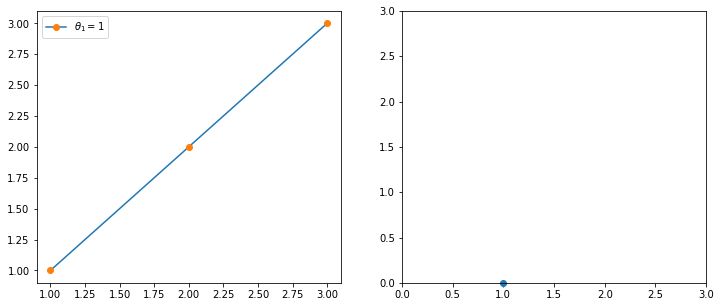

In [17]:
fig, [ax1, ax2] = plt.subplots(1, 2 ,figsize=(12, 5))
x = np.linspace(1,3,3)
ax1.plot(x, x, marker='o', markerfacecolor='C1', markeredgecolor='C1', label='$\\theta_1=1$');
line, *_ = ax2.plot([1], [0], marker='o')
line.set_clip_on(False)
ax1.legend()
ax2.set_xlim(0, 3)
ax2.set_ylim(0, 3);

$$
\begin{align}
J(\theta_1) &= \frac{1}{2m}(0^2+0^2+0^2) \\
&= 0
\end{align}
$$

When $\theta_1 = 1$, we get a slope of 1 which goes through every single data point in our model. Conversely, when $\theta_1 = 0.5$, we see the vertical distance from our fit to the data points increase. 

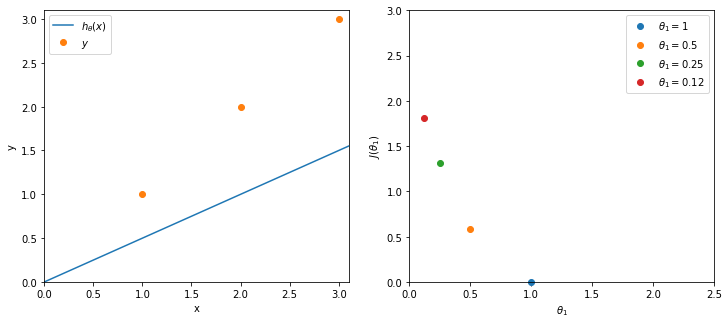

In [18]:
fig, [ax1, ax2] = plt.subplots(1, 2 ,figsize=(12, 5))
x = np.linspace(1,3,3)
ax1.axline((x[0], x[0]*0.5), slope=0.5, label='$h_\\theta(x)$')
line, *_ = ax1.plot(x, x, marker='o', ls='none', c="C1", label='$y$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xlim(0, 3.1)
ax1.set_ylim(0, 3.1)
ax1.legend()

for O in [1, 0.5, 0.25, 0.12]:
    line, *_ = ax2.plot(O, J(x, x*O), marker='o', ls='none', label=f'$\\theta_1={O}$')
    line.set_clip_on(False)

ax2.legend()
ax2.set_xlim(0, 2.5)
ax2.set_ylim(0, 3)
ax2.set_xlabel('$\\theta_1$')
ax2.set_ylabel('$J(\\theta_1)$');

Plotting 15 $\theta_1$ values in the interval $[-0.5, 2.5]$ yields a bell shaped graph 

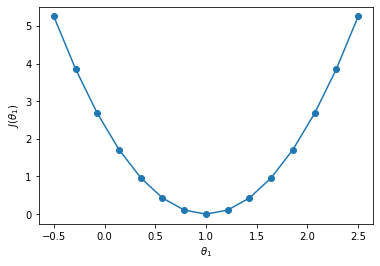

In [19]:
O = np.linspace(-.5, 2.5, 15)
x = np.linspace(1, 3, 3)
X = np.full((len(O), len(x)), x)
Y = (X.T * O).T
j = J(X.T, Y.T)

fig, ax = plt.subplots()
ax.plot(O, j, marker='o')
ax.set_xlabel('$\\theta_1$')
ax.set_ylabel('$J(\\theta_1)$');

Thus as a goal, we should try to minimize the cost function. In this case, $\theta_1 = 1$ is our global minimum. 

Text(0.5, 1.0, 'Cost function')

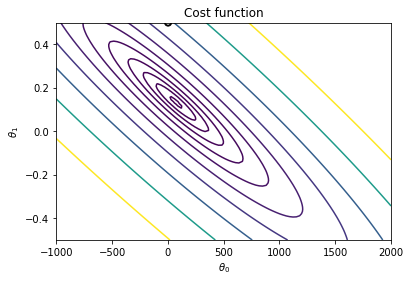

In [104]:
training_set = pd.read_csv('data/house_pricing.csv')
x, _, y = training_set.T.values
y = y / 1000
# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots()

def cost_func(theta0, theta1, x, y):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

theta0_grid = np.linspace(-1000,2000,100)
theta1_grid = np.linspace(-.5, .5,100)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis], x, y)

X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax.contour(X, Y, J_grid, np.logspace(1, 6, 20))
# ax[1].clabel(contours)
ax.scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_title('Cost function')

array([1.e+001, 1.e+002, 1.e+003, 1.e+004, 1.e+005, 1.e+006, 1.e+007,
       1.e+008, 1.e+009, 1.e+010, 1.e+011, 1.e+012, 1.e+013, 1.e+014,
       1.e+015, 1.e+016, 1.e+017, 1.e+018, 1.e+019, 1.e+020, 1.e+021,
       1.e+022, 1.e+023, 1.e+024, 1.e+025, 1.e+026, 1.e+027, 1.e+028,
       1.e+029, 1.e+030, 1.e+031, 1.e+032, 1.e+033, 1.e+034, 1.e+035,
       1.e+036, 1.e+037, 1.e+038, 1.e+039, 1.e+040, 1.e+041, 1.e+042,
       1.e+043, 1.e+044, 1.e+045, 1.e+046, 1.e+047, 1.e+048, 1.e+049,
       1.e+050, 1.e+051, 1.e+052, 1.e+053, 1.e+054, 1.e+055, 1.e+056,
       1.e+057, 1.e+058, 1.e+059, 1.e+060, 1.e+061, 1.e+062, 1.e+063,
       1.e+064, 1.e+065, 1.e+066, 1.e+067, 1.e+068, 1.e+069, 1.e+070,
       1.e+071, 1.e+072, 1.e+073, 1.e+074, 1.e+075, 1.e+076, 1.e+077,
       1.e+078, 1.e+079, 1.e+080, 1.e+081, 1.e+082, 1.e+083, 1.e+084,
       1.e+085, 1.e+086, 1.e+087, 1.e+088, 1.e+089, 1.e+090, 1.e+091,
       1.e+092, 1.e+093, 1.e+094, 1.e+095, 1.e+096, 1.e+097, 1.e+098,
       1.e+099, 1.e+